#### Import Pandas, Numpy, Seaborn, Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the csv

In [2]:
df=pd.read_csv('Data/Breast cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### For now we will drop only 'id' and 'unnamed' cols 

In [4]:
cols_to_drop = ['id','Unnamed: 32']
df.drop(cols_to_drop,axis=1,inplace=True)

In [5]:
df.shape

(569, 31)

#### Check for null values

In [6]:
df.isna().sum().sum()

0

#### Encoding our categorical variable

In [7]:
df = pd.get_dummies(df,drop_first=True)

In [8]:
df.rename(columns={'diagnosis_M':'Cancer'},inplace=True)

###### First split the data into X and y (independent and dependent variables)

In [9]:
X = df.drop('Cancer',axis=1)
y = df.Cancer

#### Check for imbalance

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


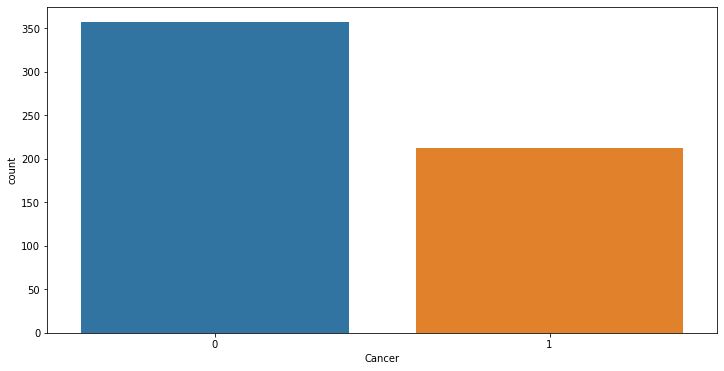

In [10]:
plt.figure(figsize=(12,6))
ax = sns.countplot(y, label="Count")

##### This would work normally but i prefer to make the data perfectly balanced so lets do that

In [11]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN(sampling_strategy='all')
X_sm,y_sm =sm.fit_resample(X,y)

In [12]:
from collections import Counter

print(Counter(y_sm))
print(Counter(y))

Counter({0: 311, 1: 304})
Counter({0: 357, 1: 212})


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=42)

#### To avoid the curse of dimensionality we wil remove some columns using a wrapper method



I am fitting the model on training data as it is the best practice 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['perimeter_mean', 'area_mean', 'concave points_mean', 'area_se',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [15]:
X_new = X_sm[['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst']]

In [16]:
new_df = pd.concat([X_new,y_sm],axis=1)

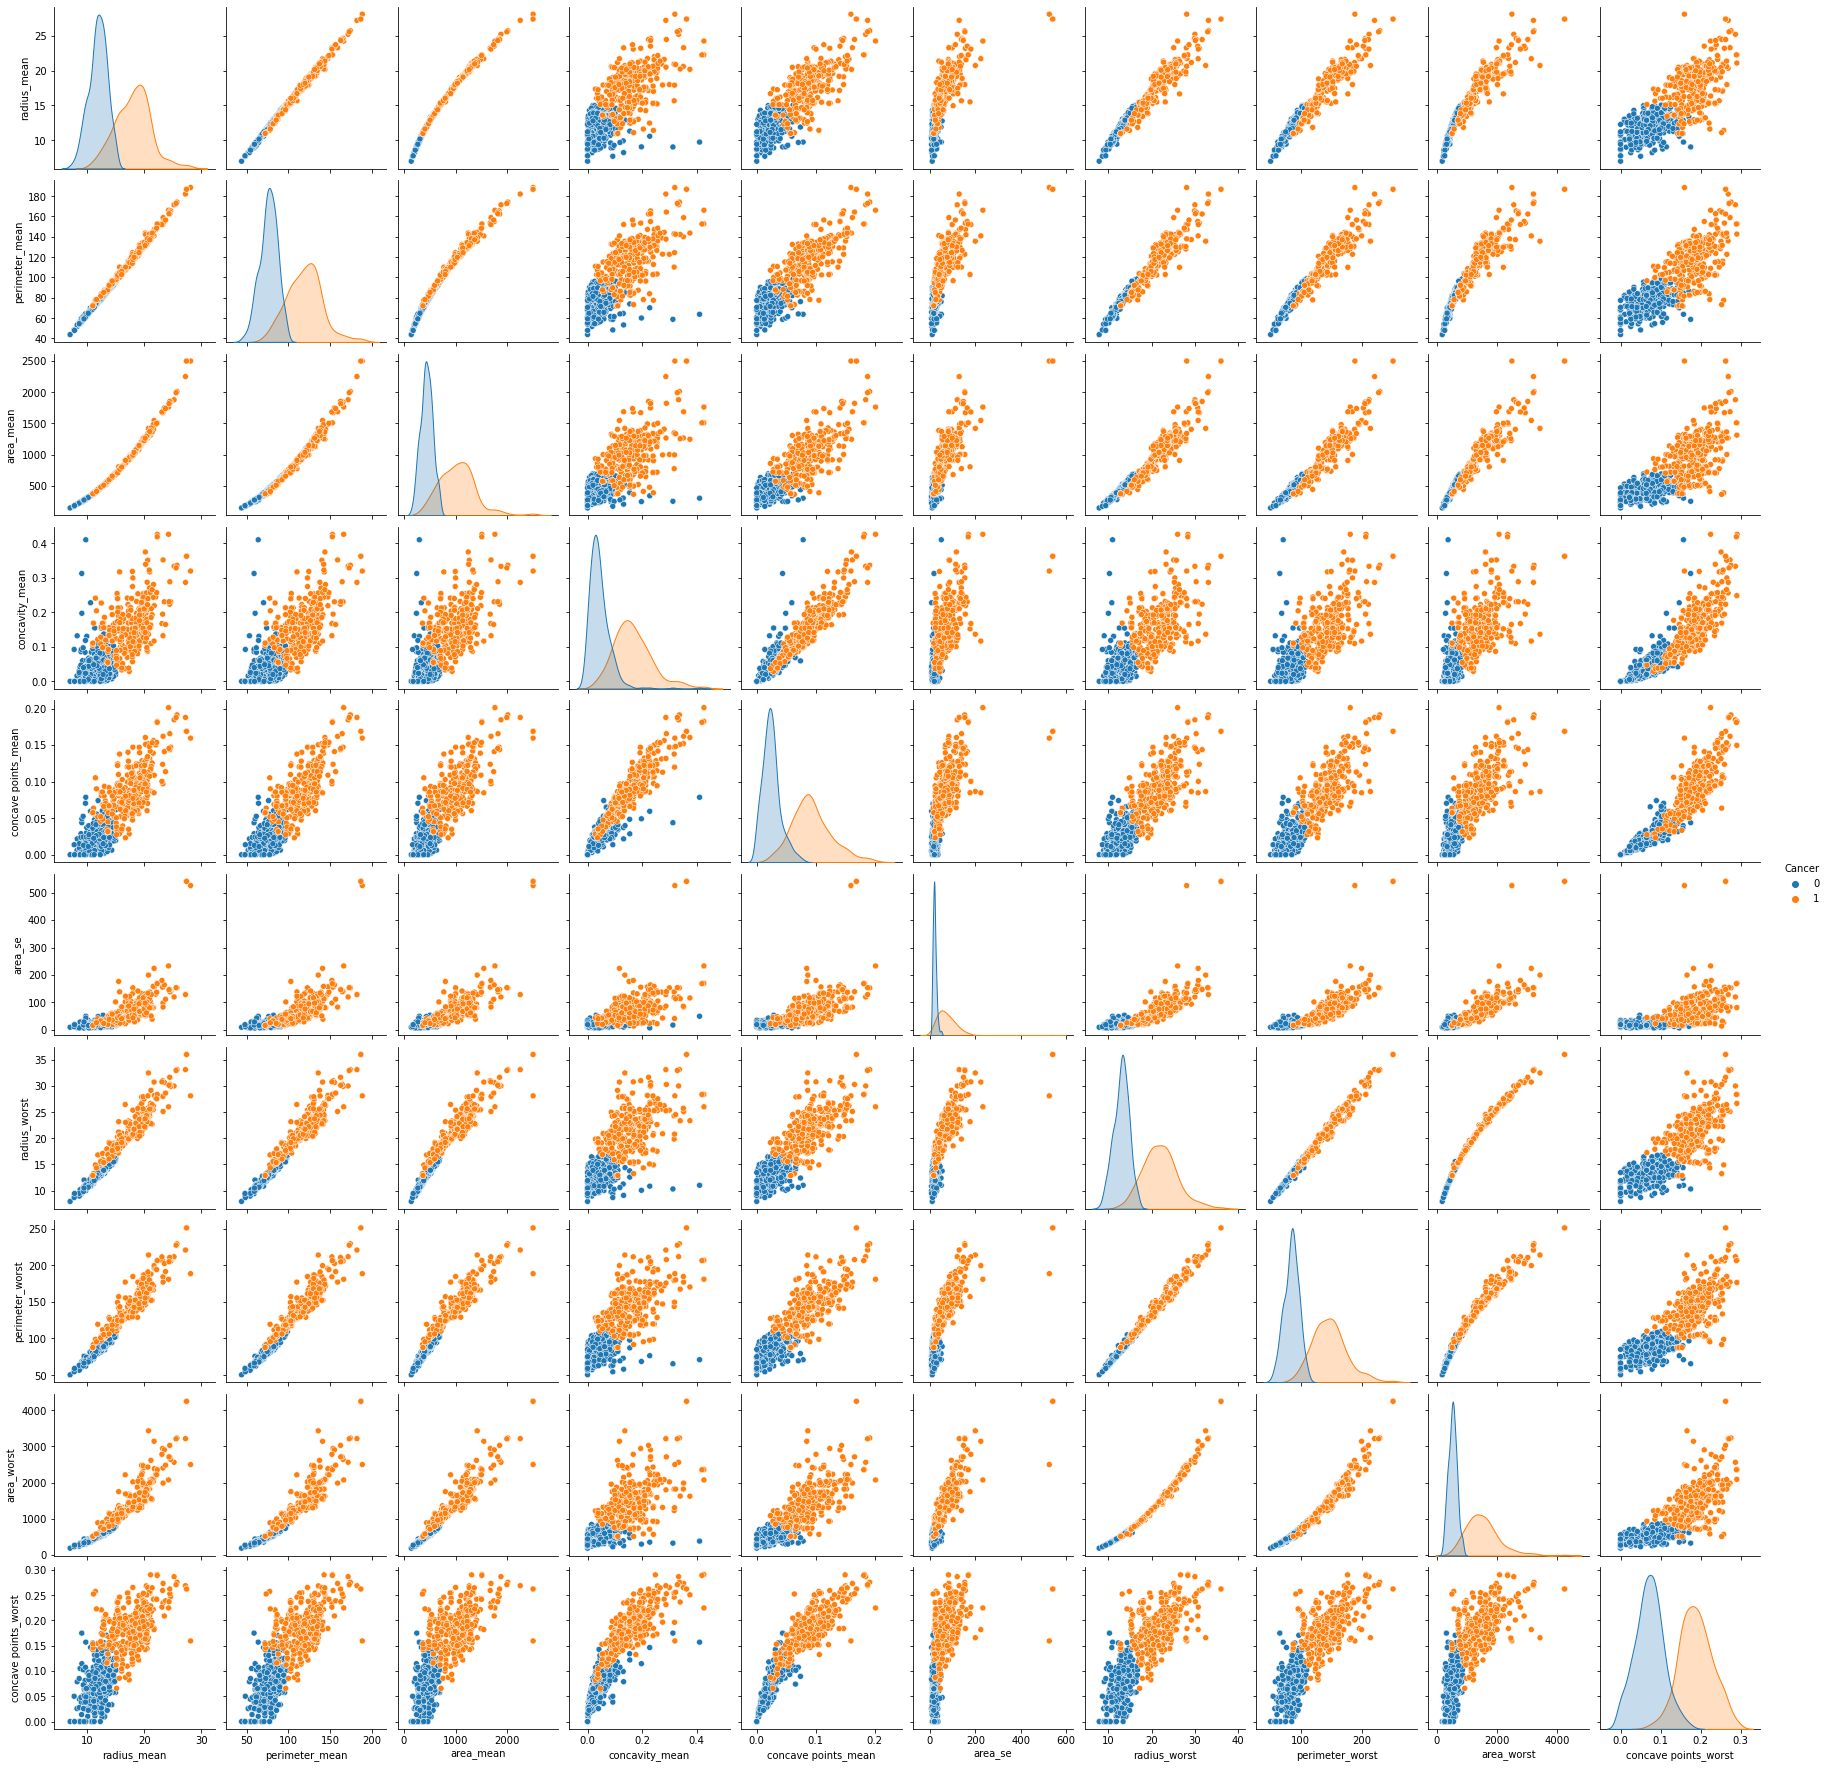

In [17]:
sns.pairplot(new_df,hue='Cancer')

#### Check the correlations between variables

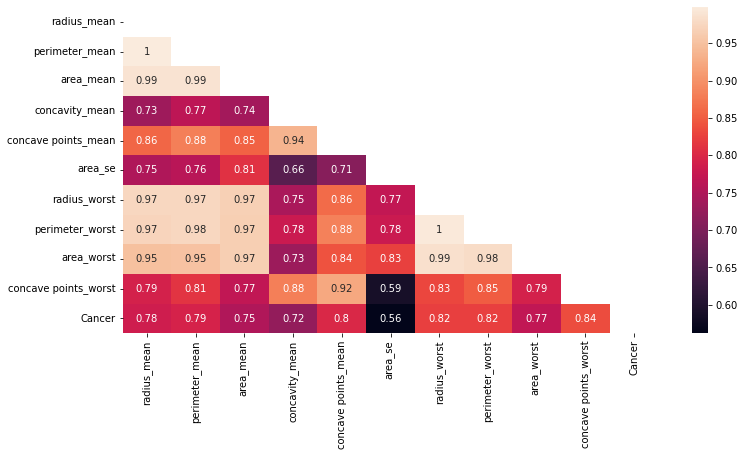

In [18]:
plt.figure(figsize=(12,6))
mask=np.triu(new_df.corr())

sns.heatmap(new_df.corr(),annot=True,mask=mask)
plt.show()

##### These variables show multicollinearity so we will drop some 

In [19]:
X_final = X_sm[['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean']]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final,y_sm,test_size=0.3,random_state=42)

#### Model training

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
random_state = 42


model1 = DecisionTreeClassifier(random_state=random_state)
model2 = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=random_state))
model3 = RandomForestClassifier(n_estimators=50,random_state=random_state)
model4 = GradientBoostingClassifier(random_state=random_state)
model5 = LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=10000)
model6 = XGBClassifier(random_state = random_state)
model7 = SVC(random_state=random_state)
model8 = KNeighborsClassifier()
model9 = GaussianNB()



def make_classification(X_train, X_test, y_train, y_test):
    accuracy, f1,crossvalscore = [], [],[]

    

    ##classifiers
    classifiers = []
    classifiers.append(model1)
    classifiers.append(model2)
    classifiers.append(model3)
    classifiers.append(model4)
    classifiers.append(model5)
    classifiers.append(model6)
    classifiers.append(model7)
    classifiers.append(model8)
    classifiers.append(model9)

    for classifier in classifiers:
        # classifier and fitting
        clf = classifier
        clf.fit(X_train, y_train)

        # predictions
        y_preds = clf.predict(X_test)

        # metrics
        accuracy.append(((accuracy_score(y_test, y_preds))) * 100)
        f1.append(((f1_score(y_test, y_preds))) * 100)
        crossvalscore.append(np.mean(cross_val_score(clf,X_sm,y_sm,cv=5)))
        

    results_df = pd.DataFrame({"Accuracy Score": accuracy,
                               "f1 Score": f1,
                               'Cross_val_score':crossvalscore,
                               "ML Models": ["DecisionTree", "AdaBoost",
                                             "RandomForest", "GradientBoosting",
                                             "Logistic reg",'XGB',
                                             "SVC", "KNN","GNB"]})

    results = (results_df.sort_values(by=['Cross_val_score'], ascending=False)
               .reset_index(drop=True))

    return classifiers, results


classifiers, results = make_classification(X_train, X_test, y_train, y_test)

results

,Accuracy Score,f1 Score,Cross_val_score,ML Models
0,99.459459,99.378882,0.993496,RandomForest
1,90.810811,89.440994,0.993496,KNN
2,97.297297,96.969697,0.990244,XGB
3,94.054054,93.167702,0.986992,Logistic reg
4,97.297297,96.969697,0.983740,AdaBoost
5,96.216216,95.705521,0.982114,DecisionTree
6,96.216216,95.597484,0.982114,GNB
7,98.378378,98.159509,0.980488,GradientBoosting
8,91.351351,89.873418,0.951220,SVC


#### Lets see the classification report  

In [22]:
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import classification_report
print('Report for Random Forest:')
print(classification_report(y_test,y_pred3))
print('Report for Gradient Boosting:')
print(classification_report(y_test,y_pred4))



Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       104
           1       1.00      0.99      0.99        81

    accuracy                           0.99       185
   macro avg       1.00      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185

Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       104
           1       0.98      0.99      0.98        81

    accuracy                           0.98       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.98      0.98      0.98       185



#### Lets test the models 

#### First Cancer = 1 ('Malignant')

In [23]:
data= np.array([[12.520914,82.080726,489.192099,0.102852,0.047124]])
prediction1 = model3.predict(data)
prediction2 = model4.predict(data)
print(prediction1)
print(prediction2)

[0]
[0]


C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


#### Now Cancer = 0 ('Benign')

In [24]:
data= np.array([[13.540,87.46,566.3,0.06664,0.047810]])
prediction1 = model3.predict(data)
prediction2 = model4.predict(data)
print(prediction1)
print(prediction2)

[0]
[1]


C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [26]:
import pickle

pickle.dump(model6, open('BreastcancerRF.pkl','wb'))
           